# Lecture 2 - Pandas and Plotting

> Data in, plots out. You will learn the core pandas objects and a gallery of plot types.

```{admonition} Who is this for?
If you finished Lecture 1 or are comfortable running cells, you are ready.
```

```{contents}
:local:
:depth: 1
```

## Learning goals

- Understand what pandas is (`pd`) and what a **DataFrame** is (`df`), plus the usual naming conventions.
- Read a CSV into a pandas **DataFrame** and inspect it.
- Work with **Series** and **DataFrame**: select rows and columns, filter, group, summarize.
- Make common plots with Matplotlib: line, scatter, bar, histogram, box, violin, heatmap, function plots, error bars.
- Combine pandas and plotting to explore real data.

---

Below is the Interactive Colab Version:
[![Colab](https://img.shields.io/badge/Open-Colab-orange)](https://colab.research.google.com/drive/158enk5itjJyrI2c9J0i5_o0q58MKmlFU?usp=sharing) 

Please also check out
https://matplotlib.org/stable/gallery/index.html
for more documentation

## 1. First plot - a Beer-Lambert style line

Assume path length $b=1$ cm and molar absorptivity $\epsilon=120\ \mathrm{L\ mol^{-1}\ cm^{-1}}$. Plot absorbance vs concentration.

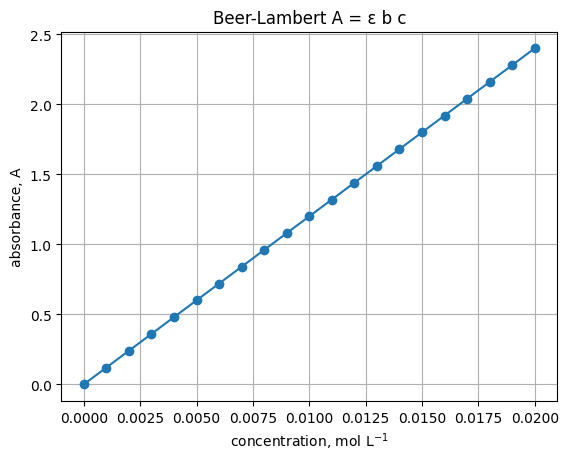

In [1]:
# Imports used throughout this lecture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
epsilon = 120.0   # L mol^-1 cm^-1
b = 1.0           # cm
c = np.linspace(0, 0.02, 21)     # mol L^-1
A = epsilon * b * c

plt.plot(c, A, marker="o")
plt.xlabel("concentration, mol L$^{-1}$")
plt.ylabel("absorbance, A")
plt.title("Beer-Lambert A = ε b c")
plt.grid(True)

### 1.1 What each plotting call means

**`plt.figure(figsize=(w, h))`**  
Start a new blank figure. Use it when you do not want a new plot to draw on top of an old one.  
- `figsize` is width and height in inches. Example: `(6, 4)`.

**`plt.plot(x, y, marker="o", linestyle="-", linewidth=1, label="text")`**  
Draw a line plot of `y` vs `x`.  
- `marker="o"` puts a circle at each data point.  
- `linestyle` can be `"-"`, `"--"`, `":"`, or `"-."`.  
- `linewidth` controls line thickness.  
- `label` sets the name shown in a legend.

**`plt.xlabel("text")`, `plt.ylabel("text")`**  
Label the horizontal and vertical axes. You can include math with `$...$`, for example `mol L$^{-1}$`.

**`plt.title("text")`**  
Add a title to the axes.

**`plt.grid(True)`**  
Show a grid to make reading values easier.  
- You can target one axis with `plt.grid(axis="y")`.

**`plt.xlim(left, right)`, `plt.ylim(bottom, top)`**  
Set the visible range for each axis. Use these to zoom in or to force the origin to be visible.  
- Example: `plt.xlim(0, c.max())`.

**`plt.legend()`**  
Show a legend for any lines that have a `label=`.

**`plt.savefig("name.png", dpi=150, bbox_inches="tight")`**  
Save the current figure to a file.  
- `dpi` controls sharpness for raster formats.  
- `bbox_inches="tight"` trims extra margins.

---

### 1.2 Mini examples

**1) Basic line with markers**

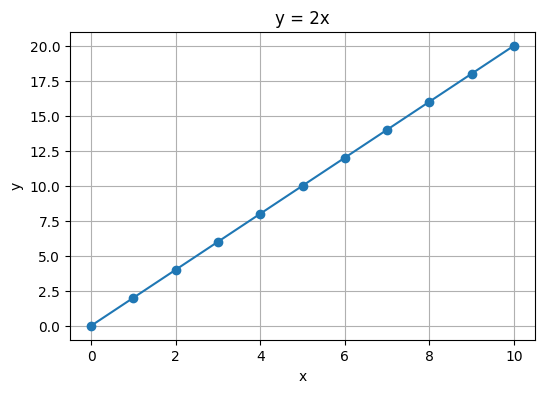

In [2]:
x = np.linspace(0, 10, 11)
y = 2 * x

plt.figure(figsize=(6, 4))
plt.plot(x, y, marker="o")         # line plus markers
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = 2x")
plt.grid(True)

**2) Change style and set limits**

(0.0, 25.0)

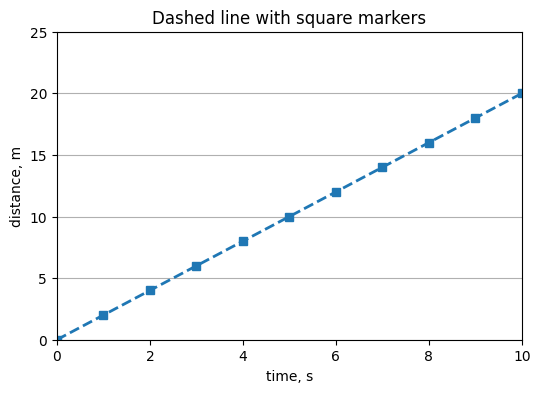

In [3]:
plt.figure(figsize=(6, 4))
plt.plot(x, y, linestyle="--", marker="s", linewidth=2)
plt.xlabel("time, s")
plt.ylabel("distance, m")
plt.title("Dashed line with square markers")
plt.grid(axis="y")
plt.xlim(0, 10)
plt.ylim(0, 25)

**3) Two lines and a legend**

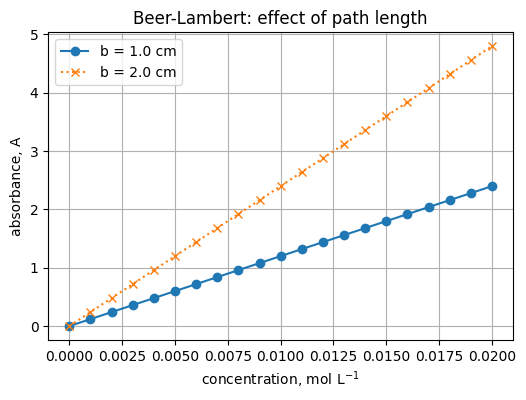

In [4]:
c = np.linspace(0.0, 0.020, 21)   # mol L^-1
epsilon = 120.0                   # L mol^-1 cm^-1
b1 = 1.0                          # cm
b2 = 2.0                          # cm

A1 = epsilon * b1 * c
A2 = epsilon * b2 * c

plt.figure(figsize=(6, 4))
plt.plot(c, A1, marker="o", label="b = 1.0 cm")
plt.plot(c, A2, marker="x", linestyle=":", label="b = 2.0 cm")
plt.xlabel("concentration, mol L$^{-1}$")
plt.ylabel("absorbance, A")
plt.title("Beer-Lambert: effect of path length")
plt.grid(True)
plt.legend()

**4) Save the figure to a file**

In [5]:
plt.savefig("beer_lambert_example.png", dpi=150, bbox_inches="tight")
"Saved file: beer_lambert_example.png"

'Saved file: beer_lambert_example.png'

<Figure size 640x480 with 0 Axes>

---

### 1.3 Quick troubleshooting

- New plot drew on top of the old one  
  → Call `plt.figure()` before the new `plt.plot(...)`.
- Empty figure in some environments  
  → In classic Jupyter, add `%matplotlib inline` near the top of the notebook.
- Labels cut off when saving  
  → Use `bbox_inches="tight"` in `plt.savefig(...)`.

```{admonition} Exercise 9.1
Change $\epsilon$ to 80 and re-run. What happens to the slope?
:class: dropdown

**Answer** - the line is less steep because absorbance is proportional to $\epsilon$.
```


```{admonition} Common message types
:class: tip
- **NameError** - you misspelled a name or used it before defining it.
- **TypeError** - you used the wrong kind of value.
- **KeyError** - dictionary key not found, e.g. `"Na"` missing from `aw`.
```


```{admonition} Save your work
Click **Save** or press `Ctrl+S`. Commit to version control if you use git.
```

---

## 2. Quick gallery of plot types

We will generate small arrays and plot them. Run each cell and read the comments.

```{admonition} Parameters to know for line plots
`plt.plot(x, y, ...)`
- `marker` shape of points, e.g. `"o"`, `"s"`, `"x"`, `"^"`
- `linestyle` line pattern, e.g. `"-"`, `"--"`, `":"`, `"-."`
- `linewidth` thickness in points
- `label` text used in `plt.legend()`
- `alpha` transparency from 0 to 1
```

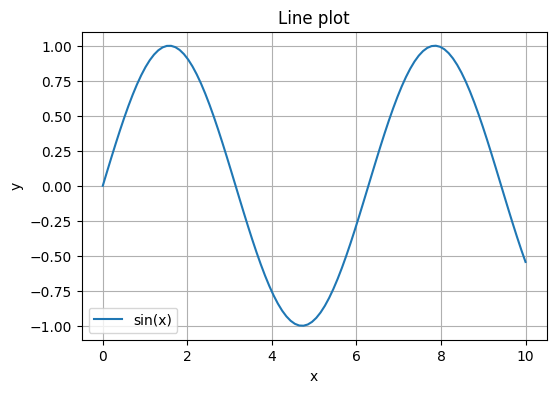

In [6]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label="sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Line plot")
plt.grid(True)
plt.legend()

```{admonition} Parameters to know for scatter
`plt.scatter(x, y, ...)`
- `s` marker size in points squared
- `marker` marker shape
- `alpha` transparency
- `c` colors for points; pass a single color or an array mapped to a colormap
- `cmap` colormap used when `c` is numeric
```

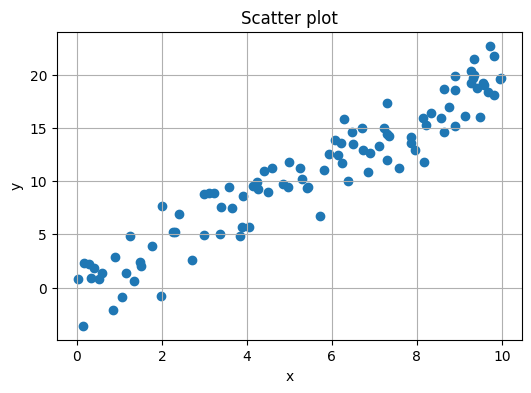

In [7]:
rng = np.random.default_rng(0)
x = rng.uniform(0, 10, 100)
y = 2 * x + rng.normal(0, 2, size=100)

plt.figure(figsize=(6, 4))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot")
plt.grid(True)

```{admonition} Parameters to know for bar charts
`plt.bar(x, height, ...)`
- `width` bar thickness
- `yerr` vertical error bars
- `capsize` length of error bar caps
- `align` `"center"` or `"edge"`
```

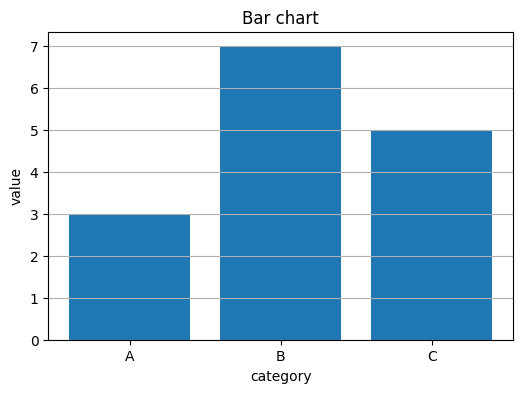

In [8]:
categories = ["A", "B", "C"]
heights = [3, 7, 5]

plt.figure(figsize=(6, 4))
plt.bar(categories, heights)
plt.xlabel("category")
plt.ylabel("value")
plt.title("Bar chart")
plt.grid(axis="y")

```{admonition} Parameters to know for histograms
`plt.hist(data, ...)`
- `bins` number of bins or bin edges
- `range` lower and upper bound for bins
- `density=True` to show a probability density instead of counts
- `alpha` transparency when overlaying multiple histograms
```

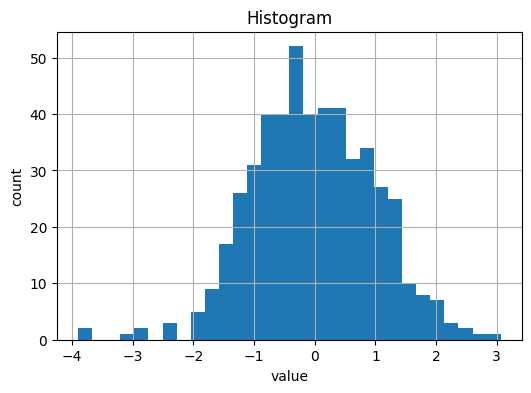

In [9]:
data = rng.normal(0, 1, size=500)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30)
plt.xlabel("value")
plt.ylabel("count")
plt.title("Histogram")
plt.grid(True)

```{admonition} Parameters to know for box plots
`plt.boxplot(data, ...)`
- `labels` names under each box
- `showmeans=True` to mark the mean
- `whis` whisker length as a factor of IQR or a percentile
```

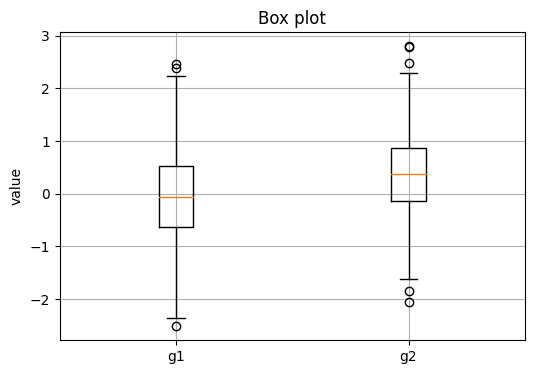

In [10]:
group1 = rng.normal(0, 1, size=200)
group2 = rng.normal(0.5, 0.8, size=200)

plt.figure(figsize=(6, 4))
plt.boxplot([group1, group2], labels=["g1", "g2"])
plt.ylabel("value")
plt.title("Box plot")
plt.grid(True)

```{admonition} Parameters to know for violin plots
`plt.violinplot(data, ...)`
- `showmeans`, `showmedians`, `showextrema` toggles for guides
- `widths` overall width of violins
- Input is a list of arrays or a 2D array by column
```

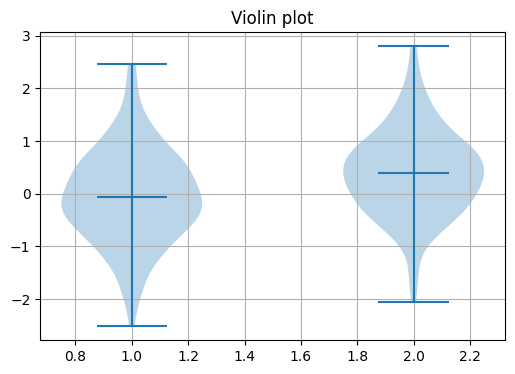

In [11]:
plt.figure(figsize=(6, 4))
plt.violinplot([group1, group2], showmeans=True)
plt.title("Violin plot")
plt.grid(True)

```{admonition} Parameters to know for heatmaps with imshow
`plt.imshow(Z, ...)`
- `origin="lower"` puts row 0 at the bottom
- `aspect="auto"` lets axes scale independently
- `extent=[xmin, xmax, ymin, ymax]` maps array indices to axis coordinates
- Add `plt.colorbar(label="...")` to show a scale
```

Text(0.5, 1.0, 'Heatmap style with imshow')

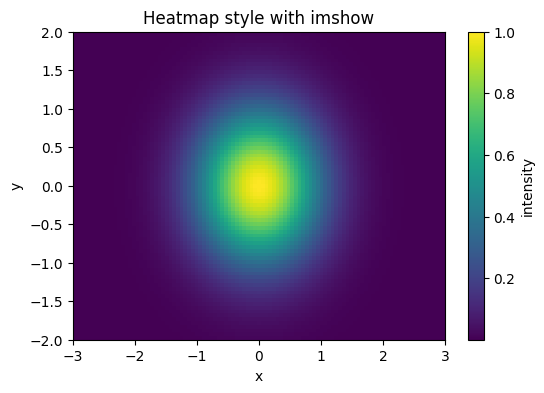

In [12]:
# Heatmap with imshow
x = np.linspace(-3, 3, 101)
y = np.linspace(-2, 2, 81)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

plt.figure(figsize=(6, 4))
plt.imshow(Z, aspect="auto", origin="lower", extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar(label="intensity")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap style with imshow")

```{admonition} Parameters to know for error bars
`plt.errorbar(x, y, yerr=..., fmt="o-")`
- `yerr` vertical errors; pass a scalar, array, or 2D array for asymmetric errors
- `xerr` horizontal errors
- `fmt` sets marker and line style together, e.g. `"o-"`, `"s:"`
- `capsize` adds small caps at error bar tips when used with bar, or via kwargs in `errorbar`
```

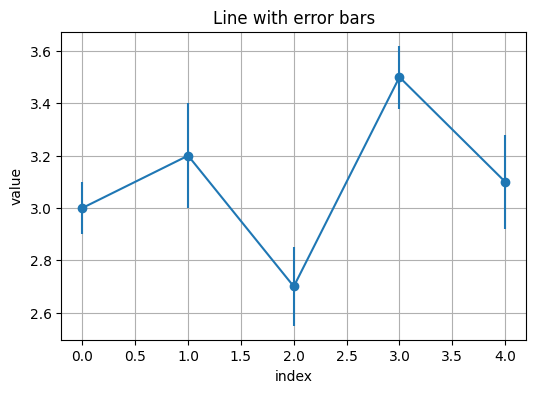

In [13]:
# Error bars
x = np.arange(5)
y = np.array([3.0, 3.2, 2.7, 3.5, 3.1])
yerr = np.array([0.1, 0.2, 0.15, 0.12, 0.18])

plt.figure(figsize=(6, 4))
plt.errorbar(x, y, yerr=yerr, fmt="o-")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Line with error bars")
plt.grid(True)

## 3. Pandas essentials



### 3.1 What is pandas and why `pd`?

```{admonition} Read
**pandas** is a Python library for working with tabular data. It gives you two core objects:

- **Series**: one labeled column of data.
- **DataFrame**: a table made of many Series sharing the same row index.

By convention we write `import pandas as pd`. The short alias `pd` saves typing and you will see it in almost every example online and in documentation.
```

In [14]:
# Imports used throughout this lecture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 3.2 What is a DataFrame and why do people name it `df`?

```{admonition} Read
A **DataFrame** is a 2D table with labeled rows and columns. It keeps:

- `df.values` - the actual numbers or strings as a NumPy array-like
- `df.index` - row labels
- `df.columns` - column names
- `df.dtypes` - data type of each column

`df` is not a special keyword. It is just a common variable name for “this DataFrame”.
You can name it `data`, `table`, or anything else. We will use `df` because it is short and familiar.
```

In [15]:
# Build a small DataFrame
df = pd.DataFrame(
    {
        "compound": ["CO2", "H2O", "NH3", "CH4"],
        "molar_mass": [44.0095, 18.0153, 17.0305, 16.0430],
        "state": ["gas", "liquid", "gas", "gas"]
    }
)

# Inspect the table
print("Shape:", df.shape)        # (rows, columns)
print("\nDtypes:\n", df.dtypes)  # data types per column
print("\nHead:\n", df.head())    # first 5 rows

Shape: (4, 3)

Dtypes:
 compound       object
molar_mass    float64
state          object
dtype: object

Head:
   compound  molar_mass   state
0      CO2     44.0095     gas
1      H2O     18.0153  liquid
2      NH3     17.0305     gas
3      CH4     16.0430     gas


```{admonition} Key ideas
- Select one column: `df["molar_mass"]` gives a **Series**.
- Select several columns: `df[["compound", "state"]]` gives a **DataFrame**.
- Filter rows: `df[df["state"] == "gas"]`
- Location by labels vs positions:
  - `.loc[rows, cols]` uses labels, e.g. `df.loc[1:3, ["compound", "molar_mass"]]`
  - `.iloc[r, c]` uses integer positions, e.g. `df.iloc[0:2, 0:2]`
```

In [16]:
# A quick select, filter, and compute
gases = df[df["state"] == "gas"]
mass_ratio = df["molar_mass"] / df.loc[df["compound"] == "H2O", "molar_mass"].iloc[0]
df = df.assign(mass_ratio_to_water = mass_ratio)
df

,compound,molar_mass,state,mass_ratio_to_water
0,CO2,44.0095,gas,2.442896
1,H2O,18.0153,liquid,1.000000
2,NH3,17.0305,gas,0.945335
3,CH4,16.0430,gas,0.890521


In [17]:
# Inspect
df.head(), df.shape, df.dtypes, df.index, df.columns

(  compound  molar_mass   state  mass_ratio_to_water
 0      CO2     44.0095     gas             2.442896
 1      H2O     18.0153  liquid             1.000000
 2      NH3     17.0305     gas             0.945335
 3      CH4     16.0430     gas             0.890521,
 (4, 4),
 compound                object
 molar_mass             float64
 state                   object
 mass_ratio_to_water    float64
 dtype: object,
 RangeIndex(start=0, stop=4, step=1),
 Index(['compound', 'molar_mass', 'state', 'mass_ratio_to_water'], dtype='object'))

```{admonition} Try
Use `df.info()` and `df.describe()` below.
```

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   compound             4 non-null      object 
 1   molar_mass           4 non-null      float64
 2   state                4 non-null      object 
 3   mass_ratio_to_water  4 non-null      float64
dtypes: float64(2), object(2)
memory usage: 256.0+ bytes


In [19]:
df.describe()

,molar_mass,mass_ratio_to_water
count,4.000000,4.000000
mean,23.774575,1.319688
std,13.513959,0.750138
min,16.043000,0.890521
25%,16.783625,0.931632
50%,17.522900,0.972668
75%,24.513850,1.360724
max,44.009500,2.442896


```{admonition} Practice
Add a new row for O2 with molar mass 31.998 and state "gas". Hint: `pd.concat` with a tiny DataFrame.
```

### 3.2 Selecting rows and columns

```{admonition} Read
Use `[]` for a single column, `.loc` for names, `.iloc` for positions, and boolean masks for filters.
```

In [20]:
df["molar_mass"]           # column by name

0    44.0095
1    18.0153
2    17.0305
3    16.0430
Name: molar_mass, dtype: float64

In [21]:
df[["compound", "state"]]  # multiple columns

,compound,state
0,CO2,gas
1,H2O,liquid
2,NH3,gas
3,CH4,gas


In [22]:
gases = df[df["state"] == "gas"]
gases

,compound,molar_mass,state,mass_ratio_to_water
0,CO2,44.0095,gas,2.442896
2,NH3,17.0305,gas,0.945335
3,CH4,16.0430,gas,0.890521


In [23]:
df_loc = df.loc[1:3, ["compound", "molar_mass"]]
df_loc

,compound,molar_mass
1,H2O,18.0153
2,NH3,17.0305
3,CH4,16.0430


In [24]:
df_iloc = df.iloc[0:2, 0:2]
df_iloc

,compound,molar_mass
0,CO2,44.0095
1,H2O,18.0153


```{admonition} Try
Filter rows where `molar_mass > 20`, then select only `compound` and `molar_mass`.
```

```{admonition} Practice
Sort by `molar_mass` descending and show the top 3 rows.
```

### 3.3 New columns, sorting, missing values

```{admonition} Read
You can compute new columns from old ones. Handle missing values with `isna`, `fillna`, or `dropna`.
```

In [25]:
df["mass_ratio_to_water"] = df["molar_mass"] / df.loc[df["compound"] == "H2O", "molar_mass"].iloc[0]
df.sort_values("molar_mass")

,compound,molar_mass,state,mass_ratio_to_water
3,CH4,16.0430,gas,0.890521
2,NH3,17.0305,gas,0.945335
1,H2O,18.0153,liquid,1.000000
0,CO2,44.0095,gas,2.442896


In [26]:
df2 = df.copy()
df2.loc[2, "molar_mass"] = np.nan
df2.isna().sum(), df2.fillna({"molar_mass": df2["molar_mass"].mean()})

(compound               0
 molar_mass             1
 state                  0
 mass_ratio_to_water    0
 dtype: int64,
   compound  molar_mass   state  mass_ratio_to_water
 0      CO2     44.0095     gas             2.442896
 1      H2O     18.0153  liquid             1.000000
 2      NH3     26.0226     gas             0.945335
 3      CH4     16.0430     gas             0.890521)

```{admonition} Try
Create a boolean column `is_gas` from `state`.
```

### 3.4 Groupby

```{admonition} Read
Group rows that share a key and summarize.
```

In [27]:
data = pd.DataFrame({
    "state": ["gas", "liquid", "gas", "gas", "liquid"],
    "molar_mass": [44.01, 18.02, 17.03, 16.04, 46.07]
})
data.groupby("state")["molar_mass"].agg(["count", "mean", "std"])

,count,mean,std
state,,,
gas,3,25.693333,15.870420
liquid,2,32.045000,19.834345


```{admonition} Practice
On `df`, compute mean molar mass by state. Then add `min` and `max` to the aggregation.
```


---

## 4. Read a CSV

```{admonition} Read
Use one of the three options. If you have trouble, use Option C to generate the file inside the notebook.
```

**Option A. Upload in Colab**

```python
# Copy and paste below code. It runs at google Colab only
from google.colab import files
uploaded = files.upload()  # choose a CSV
import io
df_csv = pd.read_csv(io.BytesIO(uploaded["sample_beer_lambert.csv"]))  # change name if needed
df_csv.head()
```

**Option B. Load from a URL**

In [28]:
import pandas as pd

url = "https://raw.githubusercontent.com/zzhenglab/ai4chem/main/book/_data/sample_beer_lambert.csv"
df = pd.read_csv(url)
df.head()

,concentration_mol_L,replicate,absorbance_A
0,0.000,1,0.0050
1,0.000,2,-0.0032
2,0.000,3,0.0017
3,0.002,1,0.2448
4,0.002,2,0.2401


**Option C. Create a CSV inside the notebook**

In [29]:
csv_text = """concentration_mol_L,replicate,absorbance_A
0,1,0.005
0,2,-0.0032
0,3,0.0017
0.002,1,0.2448
0.002,2,0.2401
0.002,3,0.2105
0.004,1,0.4949
0.004,2,0.4331
0.004,3,0.4839
0.006,1,0.7199
0.006,2,0.7337
0.006,3,0.7272
0.008,1,0.8507
0.008,2,0.8576
0.008,3,0.8811
0.01,1,1.2017
0.01,2,1.2917
0.01,3,1.1927
0.012,1,1.4496
0.012,2,1.4109
0.012,3,1.4486
0.014,1,1.6345
0.014,2,1.6754
0.014,3,1.6719
0.016,1,1.9118
0.016,2,1.9155
0.016,3,1.9102
0.018,1,2.3632
0.018,2,2.2603
0.018,3,2.1607
0.02,1,2.3984
0.02,2,2.3021
0.02,3,2.4011

"""

with open("sample_beer_lambert.csv", "w") as f:
    f.write(csv_text)

df_csv = pd.read_csv("sample_beer_lambert.csv")
df_csv.head()

,concentration_mol_L,replicate,absorbance_A
0,0.000,1,0.0050
1,0.000,2,-0.0032
2,0.000,3,0.0017
3,0.002,1,0.2448
4,0.002,2,0.2401


```{admonition} Practice
If your file uses semicolons, call `pd.read_csv("file.csv", sep=";")`. If it uses comma decimals, add `decimal=","`.
```

---

(l2-csv-plots)=
## 5. From CSV to plots

### 5.1 Inspect and clean

```{admonition} Read
Always inspect, then remove impossible values.
```

In [30]:
df = df_csv.copy()
df.head(), df.shape, df.isna().sum()

(   concentration_mol_L  replicate  absorbance_A
 0                0.000          1        0.0050
 1                0.000          2       -0.0032
 2                0.000          3        0.0017
 3                0.002          1        0.2448
 4                0.002          2        0.2401,
 (33, 3),
 concentration_mol_L    0
 replicate              0
 absorbance_A           0
 dtype: int64)

In [31]:
df = df[df["absorbance_A"].between(-0.05, 3.0)].reset_index(drop=True)
df.head()

,concentration_mol_L,replicate,absorbance_A
0,0.000,1,0.0050
1,0.000,2,-0.0032
2,0.000,3,0.0017
3,0.002,1,0.2448
4,0.002,2,0.2401


```{admonition} Try
Count rows per concentration with `value_counts()` on `concentration_mol_L`.
```

### 5.2 Scatter of absorbance vs concentration

```{admonition} Read
Scatter shows the spread around the line.
```

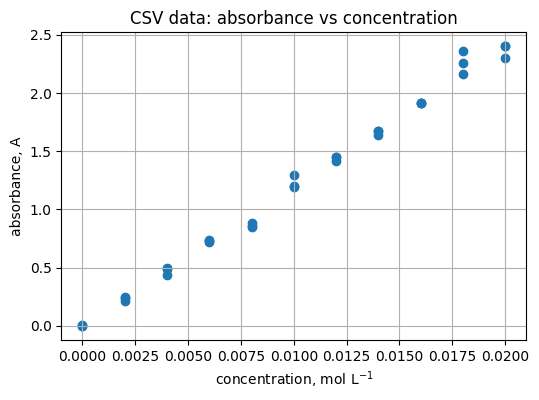

In [32]:
plt.figure(figsize=(6, 4))
plt.scatter(df["concentration_mol_L"], df["absorbance_A"])
plt.xlabel("concentration, mol L$^{-1}$")
plt.ylabel("absorbance, A")
plt.title("CSV data: absorbance vs concentration")
plt.grid(True)

```{admonition} Practice
Add light jitter to concentration to reduce overlap. Hint: add `np.random.normal(0, 2e-5, size=...)` to x values.
```

### 5.3 Fit a straight line

```{admonition} Read
Fit `A = m c + b`. Expect `m` near ε b.
```

In [33]:
x = df["concentration_mol_L"].to_numpy()
y = df["absorbance_A"].to_numpy()
m, b0 = np.polyfit(x, y, 1)
m, b0

(121.43060606060605, -0.017903030303029907)

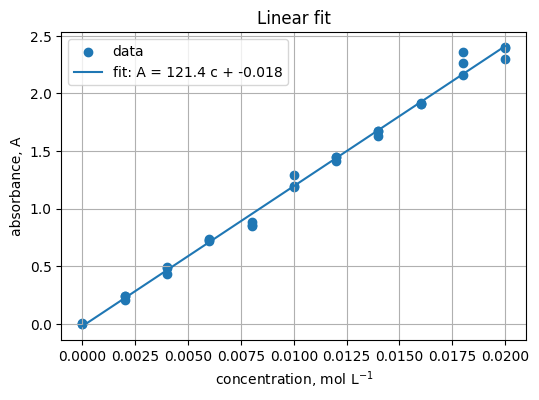

In [34]:
xline = np.linspace(x.min(), x.max(), 100)
yline = m * xline + b0

plt.figure(figsize=(6, 4))
plt.scatter(x, y, label="data")
plt.plot(xline, yline, label=f"fit: A = {m:.1f} c + {b0:.3f}")
plt.xlabel("concentration, mol L$^{-1}$")
plt.ylabel("absorbance, A")
plt.title("Linear fit")
plt.grid(True)
plt.legend()

```{admonition} Practice
Compute residuals `y - (m*x + b0)` and plot a histogram with 20 bins.
```

### 5.4 Group by concentration and show a bar chart with error bars

```{admonition} Read
Summarize replicates per concentration.
```

In [35]:
summary = (
    df.groupby("concentration_mol_L")["absorbance_A"]
      .agg(["mean", "std", "count"])
      .reset_index()
)
summary.head()

,concentration_mol_L,mean,std,count
0,0.000,0.001167,0.004126,3
1,0.002,0.231800,0.018595,3
2,0.004,0.470633,0.032967,3
3,0.006,0.726933,0.006904,3
4,0.008,0.863133,0.015937,3


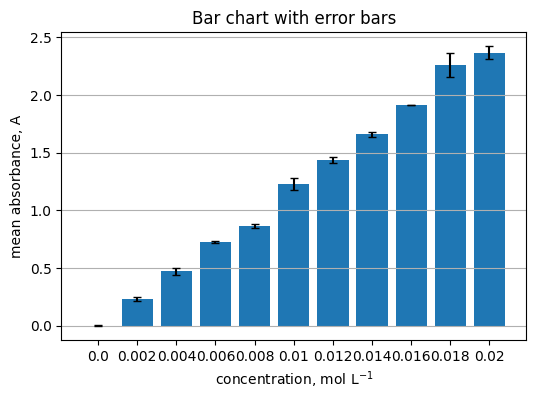

In [36]:
centers = summary["concentration_mol_L"].to_numpy()
means = summary["mean"].to_numpy()
errs = summary["std"].to_numpy()

plt.figure(figsize=(6, 4))
plt.bar(centers.astype(str), means, yerr=errs, capsize=3)
plt.xlabel("concentration, mol L$^{-1}$")
plt.ylabel("mean absorbance, A")
plt.title("Bar chart with error bars")
plt.grid(axis="y")

```{admonition} Practice
Replace bars with a scatter plot of means and vertical error bars using `plt.errorbar`.
```

### 5.5 Violin plot by concentration

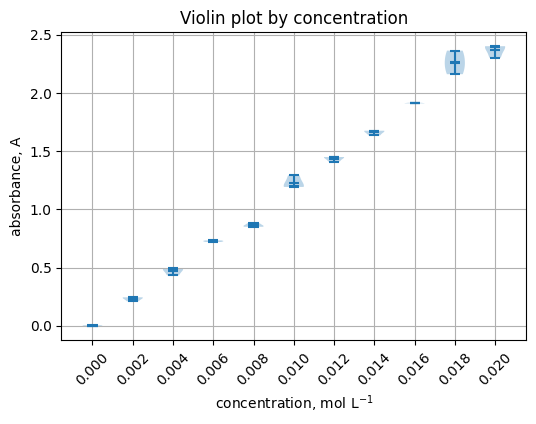

In [37]:
groups = [grp["absorbance_A"].to_numpy() for _, grp in df.groupby("concentration_mol_L")]
labels = [f"{c:.3f}" for c in sorted(df["concentration_mol_L"].unique())]

plt.figure(figsize=(6, 4))
plt.violinplot(groups, showmeans=True, showextrema=True, showmedians=True)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45)
plt.xlabel("concentration, mol L$^{-1}$")
plt.ylabel("absorbance, A")
plt.title("Violin plot by concentration")
plt.grid(True)

### 5.6 Heatmap of a pivot table

In [38]:
pivot = df.pivot_table(index="concentration_mol_L", columns="replicate", values="absorbance_A", aggfunc="mean")
pivot

replicate,1,2,3
concentration_mol_L,,,
0.000,0.0050,-0.0032,0.0017
0.002,0.2448,0.2401,0.2105
0.004,0.4949,0.4331,0.4839
0.006,0.7199,0.7337,0.7272
0.008,0.8507,0.8576,0.8811
0.010,1.2017,1.2917,1.1927
0.012,1.4496,1.4109,1.4486
0.014,1.6345,1.6754,1.6719
0.016,1.9118,1.9155,1.9102


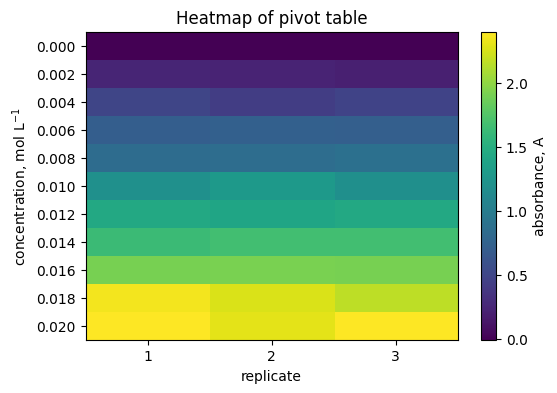

In [39]:
plt.figure(figsize=(6, 4))
plt.imshow(pivot.to_numpy(), aspect="auto")
plt.colorbar(label="absorbance, A")
plt.yticks(range(pivot.shape[0]), [f"{c:.3f}" for c in pivot.index])
plt.xticks(range(pivot.shape[1]), [str(c) for c in pivot.columns])
plt.xlabel("replicate")
plt.ylabel("concentration, mol L$^{-1}$")
plt.title("Heatmap of pivot table")
plt.grid(False)

### 5.7 Save a figure

'Saved: scatter_absorbance_vs_conc.png'

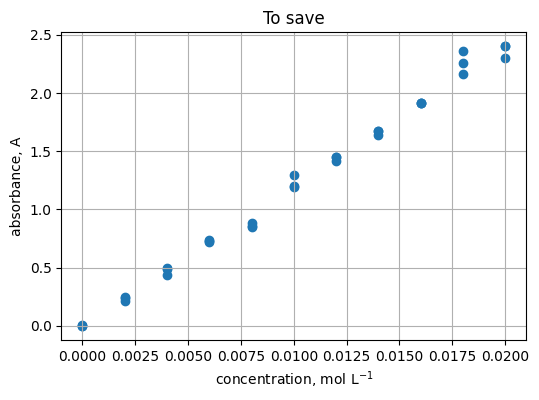

In [40]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y)
plt.xlabel("concentration, mol L$^{-1}$")
plt.ylabel("absorbance, A")
plt.title("To save")
plt.grid(True)
plt.savefig("scatter_absorbance_vs_conc.png", dpi=150, bbox_inches="tight")
"Saved: scatter_absorbance_vs_conc.png"

---


## 6. Quick reference

```{admonition} Pandas
- `import pandas as pd`  → library alias
- `df = pd.read_csv("file.csv")`, `df.to_csv("out.csv", index=False)`
- Inspect: `df.head()`, `df.info()`, `df.describe()`, `df.shape`, `df.dtypes`
- Select: `df["col"]`, `df.loc[rows, cols]`, `df.iloc[r, c]`
- Filter: `df[df["col"] > 0]`
- Group: `df.groupby("key")["val"].agg(["mean", "std"])`
```

```{admonition} Plots
- Start a new figure: `plt.figure(...)`
- Line, scatter, bar: `plt.plot(x, y)`, `plt.scatter(x, y)`, `plt.bar(labels, values)`
- Distribution and 2D: `plt.hist(x)`, `plt.violinplot(list_of_arrays)`, `plt.imshow(matrix)`
- Labels and title: `plt.xlabel`, `plt.ylabel`, `plt.title`
- Grid and legend: `plt.grid(True)`, `plt.legend()`
- Save: `plt.savefig("name.png", dpi=150, bbox_inches="tight")`
- Useful kwargs to remember: `marker`, `linestyle`, `linewidth`, `alpha`, `bins`, `yerr`, `capsize`, `extent`, `aspect`
```



---

## 7. Glossary

```{glossary}
Series
  One labeled column in pandas. Think of a vector with an index. Example: `df["yield_percent"]`.

DataFrame
  A 2D table of columns, each a Series. Example: `pd.read_csv("file.csv")`.

index
  The row labels of a Series or DataFrame. Access with `.index`.

dtype
  The data type for a column. See with `df.dtypes`.

boolean mask
  True or False array used to filter rows. Example: `df[df["yield_percent"] > 50]`.

groupby
  Split rows by a key, then compute summaries. Example: `df.groupby("state")["molar_mass"].mean()`.

pivot table
  Reshape long data into a 2D grid of values. Example: `df.pivot_table(index="temp", columns="time", values="yield")`.

NaN
  A missing value. Handle with `isna`, `fillna`, or `dropna`.

CSV
  Comma-separated values text file. Read with `pd.read_csv`, write with `df.to_csv`.

figure
  The canvas for a plot. Create with `plt.figure(figsize=(w, h))`.

axes
  The plotting area inside a figure. Most `plt.*` calls draw to the current axes.

label
  The text used in legends. Set with `label=` in plotting functions.

alpha
  Transparency from 0 to 1 in plots.

bins
  Controls histogram resolution. More bins show more detail, fewer bins smooth the shape.

yerr
  Error bar sizes along y for `plt.errorbar` or `plt.bar`.

colormap
  Maps numeric values to colors in heatmaps. Set with `cmap=...`.

aspect
  Ratio of the axes. Use `"auto"` for data-driven scaling in `plt.imshow`.

extent
  Maps array indices to axis coordinates in `plt.imshow`.

figsize
  Plot size in inches as `(width, height)` passed to `plt.figure`.
```

---

## 8. In-class activity

Each task mirrors what you practiced. Fill in `...` and later compare with the solutions in Section 9. Keep your edits near the `# TO DO:` lines.

### 8.1 Read and inspect a CSV

Read a CSV, preview structure, and count rows where a chosen column is greater than a threshold.

```python
import pandas as pd

# Path to a CSV
path = ... # "sample_beer_lambert.csv" we see in section 4

df = ...  # TO DO: read the CSV with pd.read_csv(path)
print(df.head())
print(df.info())
print(df.describe())

# Count how many rows satisfy a condition (pick a numeric column)
mask = ...  # TO DO: boolean mask, e.g., df["absorbance_A"] > 0
count_positive = ...  # TO DO: mask.sum()
print("rows with condition:", count_positive)
```

```{dropdown} Hint
Use `pd.read_csv(path)` then `df.head()`, `df.info()`, `df.describe()`. A boolean mask is an expression like `df["col"] > value`.
```

---

### 8.2 Scatter with style controls

Make a scatter of one column vs another, then adjust style parameters.

```python
import matplotlib.pyplot as plt

# Choose columns to plot
xcol = ...         # TO DO: e.g.,concentration
ycol = ...         # TO DO: e.g.,absorbance

# Style controls — change and re-run
point_size =  ...  # TO DO: e.g., 30
alpha_val  =  ...  # TO DO: e.g., 0.8
marker_sym =  ...  # TO DO: e.g., "o"

plt.figure(figsize=(6, 4))
plt.scatter(..., ..., s=..., alpha=..., marker=...)  # TO DO: e.g.,point_size, alpha_val, marker_sym

plt.xlabel(xcol)
plt.ylabel(ycol)
plt.title("Scatter: y vs x with style tweaks")
plt.grid(True)
```

```{dropdown} Hint
See Section 2 for `plt.scatter` plus `s`, `alpha`, and `marker`.
```

---

### 8.3 Group, summarize, and draw error bars

Group by a key and plot group means with standard deviation as error bars.

```python
key_col = ...    # TO DO
val_col = ...    # TO DO

summary = (
    df.groupby(key_col)[val_col]
      .agg(["mean", "std", "count"])
      .reset_index()
)

x = summary[key_col].to_numpy()
y = summary["mean"].to_numpy()
yerr = ...  # TO DO: standard deviation array

plt.figure(figsize=(6, 4))
plt.errorbar(x, y, yerr=yerr, fmt="o-")
plt.xlabel(key_col)
plt.ylabel(f"mean {val_col}")
plt.title("Group means with error bars")
plt.grid(True)
```

```{dropdown} Hint
Look back at 5.4 and the error bar example in Section 2.
```

---

### 8.4 New dataset — organic synthesis yields

Work with `organic_synthesis_yields.csv` which has columns `reaction_id`, `temperature_C`, `time_min`, `yield_percent`. The yields are skewed toward lower values but still include some high yields. Tasks:

1) Read the CSV  
2) Scatter `temperature_C` vs `yield_percent`  
3) Color points by `time_min` using `c=...` and `cmap=...`  
4) Build a pivot on `temperature_C` by `time_min` for `yield_percent` and draw a heatmap  
5) Draw a histogram of `yield_percent` with different `bins`

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Option A — read the provided CSV
path = "https://raw.githubusercontent.com/zzhenglab/ai4chem/main/book/_data/organic_synthesis_yields.csv" 



df_y = ...  # TO DO: pd.read_csv(path)
df_y.head()
```

```python
# 2) Scatter temperature vs yield
plt.figure(figsize=(6, 4))
plt.scatter(..., ..., alpha=0.7)  # TO DO: SEE NEXT TWO LINES
plt.xlabel("temperature, C")
plt.ylabel("yield, %")
plt.title("Yield vs temperature")
plt.grid(True)
```
```python
# 3) Color by time
plt.figure(figsize=(6, 4))
plt.scatter(df_y["temperature_C"], df_y["yield_percent"],
            c=..., cmap=..., alpha=0.8)  # TO DO: C = see next line
plt.colorbar(label="time, min")
plt.xlabel("temperature, C")
plt.ylabel("yield, %")
plt.title("Yield vs temperature colored by time")
plt.grid(True)
```
```python
# 4) Pivot to a 2D grid and heatmap
pivot = df_y.pivot_table(index="temperature_C", columns="time_min",
                         values="yield_percent", aggfunc="mean")
plt.figure(figsize=(7, 5))
plt.imshow(pivot.to_numpy(), aspect="auto", origin="lower")
plt.colorbar(label="yield, %")
plt.yticks(range(pivot.shape[0]), pivot.index)
plt.xticks(range(pivot.shape[1]), pivot.columns, rotation=45)
plt.xlabel("time, min")
plt.ylabel("temperature, C")
plt.title("Mean yield heatmap")
plt.grid(False)
```

```python
# 5) Histogram of yields
plt.figure(figsize=(6, 4))
plt.... # TO DO: try 15, 25, 40 for yield in histgram
plt.xlabel("yield, %")
plt.ylabel("count")
plt.title("Yield distribution")
plt.grid(True)
```

```{admonition} Make it downloadable
If you generate the CSV in the notebook, finish with:
`df_y.to_csv("organic_synthesis_yields.csv", index=False)`
```
---

### 8.5 Box and violin by binned temperature

Bin `temperature_C` into categories and compare yield distributions across bins.

```python
# Define bins and labels for temperature
bins = ...    # TO DO: e.g., 40, 60, 80, 100, 120
labels = ...  # TO DO: e.g., "40-60", "60-80", "80-100", "100-120"

df_y = ... # TO DO: make a copy
df_y["temp_bin"] = pd.cut(..., bins=bins, labels=labels, include_lowest=True)  # TO DO: column is df_y["temperature_C"]

# Build groups for violin or box plot
groups = [grp["yield_percent"].to_numpy() for _, grp in ...]  # TO DO

plt.figure(figsize=(6, 4))
# Choose one:
# plt.boxplot(groups, labels=labels, showmeans=True)
plt.violinplot(groups, showmeans=True)
plt.xticks(...) # TO DO: use range from 1 to len(labels) + 1 for labels
plt.ylabel("yield, %")
plt.title(...)
plt.grid(...)
```

```{dropdown} Hint
Use `pd.cut` to form bins. For violins, pass a list of arrays in the same order as your labels.
```